In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
train_df = pd.read_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\feature_eng_train_df.csv")
eval_df = pd.read_csv(r"C:\Users\hites\OneDrive\Desktop\Housing Regression\data\processed\feature_eng_eval_df.csv")

In [3]:
# Target & Features 
target = ["price"] 
X_train = train_df.drop(columns=target)
y_train = train_df[target] 

X_eval = eval_df.drop(columns = target) 
y_eval = eval_df[target]

In [4]:
xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [5]:
xgb_model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [6]:
y_pred = xgb_model.predict(X_eval)

mae = mean_absolute_error(y_eval, y_pred)
rmse = np.sqrt(mean_squared_error(y_eval, y_pred))
r2 = r2_score(y_eval, y_pred)

print("XGBoost Performance:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

XGBoost Performance:
MAE: 50,828.77
RMSE: 97,230.52
R²: 0.9268


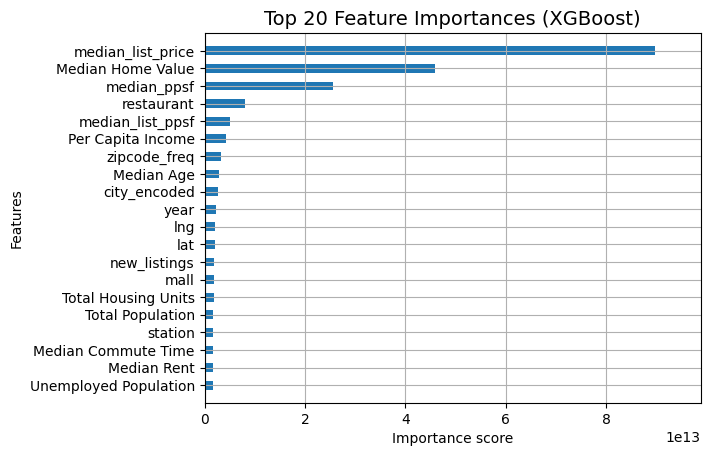

In [7]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(
    xgb_model,
    importance_type="gain",
    max_num_features=20,
    height=0.5,
    show_values=False
)
plt.title("Top 20 Feature Importances (XGBoost)", fontsize=14)
plt.show()